<a href="https://colab.research.google.com/github/pedroolib/ShapeDetectionAI/blob/main/Copia_de_Enlace_Shape_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#### Training and Test data prepareation  -> do not need to run ####

import os
import numpy as np
from PIL import Image, ImageOps
from pathlib import Path
from sklearn import preprocessing, metrics
import cv2


def load_data(tag='train'):
    """Load (training/test) data from the directory.
    Also do preprocessing to extra features.
    """
    tag_dir = Path.cwd() / tag
    print(tag_dir)
    vec = []
    cat = []
    itr = 0


    for cat_dir in tag_dir.iterdir():
        cat_label = cat_dir.stem
        for img_path in cat_dir.glob('*.png'):
            with open(img_path, 'rb') as pgmf:
                #print(img_path)
                img = cv2.imread(str(img_path))
                img = cv2.resize(img, dsize=(16, 16), interpolation=cv2.INTER_CUBIC)
                img = cv2.cvtColor(img_resize, cv2.COLOR_BGR2GRAY)

            vec.append((img.reshape((16*16))))
            cat.append(cat_label)
    return vec, cat


vec_total, cat_total = load_data('shapes')        # load training data

#vec_train = np.vstack((vec_total[1:12000:4], vec_total[2:12000:4], vec_total[3:12000:4]))
#cat_train = np.hstack((cat_total[1:12000:4], cat_total[2:12000:4], cat_total[3:12000:4]))

vec_train = np.vstack((vec_total[0:12000:4]))
cat_train = np.hstack((cat_total[0:12000:4]))

vec_test = vec_total[1:12000:4]
cat_test = cat_total[1:12000:4]

cat_train = np.transpose(cat_train)
cat_test = np.transpose(cat_test)

np.save("vec_train.npy", vec_train)
np.save("cat_train.npy", cat_train)

np.save("vec_test.npy", vec_test)
np.save("cat_test.npy", cat_test)

In [ ]:
from google.colab import files
files.upload()

Saving cat_test.npy to cat_test (1).npy
Saving cat_train.npy to cat_train (1).npy
Saving vec_test.npy to vec_test (1).npy
Saving vec_train.npy to vec_train (1).npy


{'cat_test (1).npy': b"\x93NUMPY\x01\x00v\x00{'descr': '<U8', 'fortran_order': False, 'shape': (3000,), }                                                         \nt\x00\x00\x00r\x00\x00\x00i\x00\x00\x00a\x00\x00\x00n\x00\x00\x00g\x00\x00\x00l\x00\x00\x00e\x00\x00\x00t\x00\x00\x00r\x00\x00\x00i\x00\x00\x00a\x00\x00\x00n\x00\x00\x00g\x00\x00\x00l\x00\x00\x00e\x00\x00\x00t\x00\x00\x00r\x00\x00\x00i\x00\x00\x00a\x00\x00\x00n\x00\x00\x00g\x00\x00\x00l\x00\x00\x00e\x00\x00\x00t\x00\x00\x00r\x00\x00\x00i\x00\x00\x00a\x00\x00\x00n\x00\x00\x00g\x00\x00\x00l\x00\x00\x00e\x00\x00\x00t\x00\x00\x00r\x00\x00\x00i\x00\x00\x00a\x00\x00\x00n\x00\x00\x00g\x00\x00\x00l\x00\x00\x00e\x00\x00\x00t\x00\x00\x00r\x00\x00\x00i\x00\x00\x00a\x00\x00\x00n\x00\x00\x00g\x00\x00\x00l\x00\x00\x00e\x00\x00\x00t\x00\x00\x00r\x00\x00\x00i\x00\x00\x00a\x00\x00\x00n\x00\x00\x00g\x00\x00\x00l\x00\x00\x00e\x00\x00\x00t\x00\x00\x00r\x00\x00\x00i\x00\x00\x00a\x00\x00\x00n\x00\x00\x00g\x00\x00\x00l\x00\x00\x00e\x00\x00\x00t\x0

In [ ]:
import os
import numpy as np
from PIL import Image, ImageOps
from pathlib import Path
from sklearn import preprocessing, metrics
import cv2

vec_train = np.load("vec_train.npy")
cat_train = np.load("cat_train.npy")

vec_test = np.load("vec_test.npy")
cat_test = np.load("cat_test.npy")

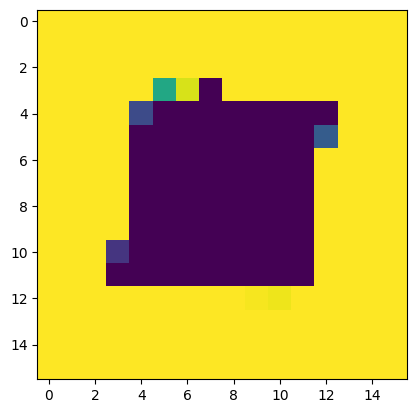

In [ ]:
import matplotlib.pyplot as plt

image_sample = np.reshape(vec_train[2809], (16, 16))
plt.imshow(  image_sample     )

In [ ]:
# Which shape are you planning to detect ?

#choose one of those

#target_shape = 'circle'
#target_shape = 'star'
#target_shape = 'square'
target_shape = 'triangle'

In [ ]:
cat_train_bin = cat_train.copy()

cat_train_bin[cat_train==target_shape] = 1
cat_train_bin[cat_train!=target_shape] = 0

cat_test_bin = cat_test.copy()

cat_test_bin[cat_test==target_shape] = 1
cat_test_bin[cat_test!=target_shape] = 0

In [ ]:
from sklearn.svm import SVC
#clf = SVC(random_state=0, tol=1e-5)
clf = SVC(kernel='linear')
#clf = SVC(kernel='rbf')
clf.fit(vec_train, cat_train_bin)

SVC(kernel='linear')

In [ ]:
# test set evaluation
prediction = clf.predict(vec_test)
acc = (prediction == cat_test_bin).sum()/len(prediction)
print('Accuracy: {0:5.2f}%'.format(acc*100))

Accuracy: 99.80%


In [ ]:
w = clf.coef_
b = clf.intercept_


w_int = np.round(w.copy()*50)
b_int = np.round(b.copy()*50)

In [ ]:
print(np.max(w_int))
print(np.min(w_int))

# 4 bit data can present only -8 to 7. So, for simplicity
w_int[w_int>7]  = 7
w_int[w_int<-8] = -8

print(np.max(w_int))
print(np.min(w_int))


1.0
-1.0
1.0
-1.0


In [ ]:
correct = 0



for i in range(0,3000):

    result = (np.dot(w_int,  np.reshape(vec_test[i],(256,1)) )  + b_int)  >  0
    #print(result.item() == int(cat_test_bin[i]))

    if (result.item() == int(cat_test_bin[i])):
        correct = correct + 1;

print("Classification accuracy is", correct/3000 *100, "%.")

Classification accuracy is 71.83333333333334 %.


In [ ]:
### camera module ###

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


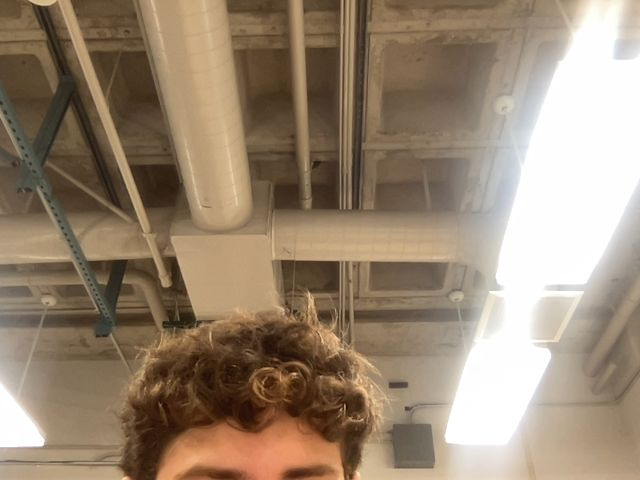

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
img = cv2.imread(filename)
img = img[0:480, 80:560, :]
img_resize = cv2.resize(img, dsize=(16, 16), interpolation=cv2.INTER_CUBIC)
img_gray = cv2.cvtColor(img_resize, cv2.COLOR_BGR2GRAY)

thres = 120

img_bin = img_gray.copy()
img_bin[img_gray > thres] = 255
img_bin[img_gray < thres] = 0

result = (np.dot(w_int,  np.reshape(img_bin,(256,1)) )  + b_int)  >  0


if (result):
  print("This image is a", target_shape, ":)")
else:
  print("This image is not a", target_shape, ":(")


This image is not a triangle :(


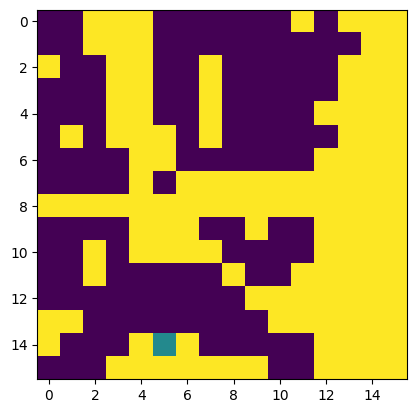

In [ ]:
#### optional cell to see the given image ####

img = cv2.imread(filename)
img = img[0:480, 80:560, :]
img_resize = cv2.resize(img, dsize=(16, 16), interpolation=cv2.INTER_CUBIC)
img_gray = cv2.cvtColor(img_resize, cv2.COLOR_BGR2GRAY)

thres = 120

img_bin = img_gray.copy()
img_bin[img_gray > thres] = 255
img_bin[img_gray < thres] = 0

import matplotlib.pyplot as plt

image_sample = np.reshape(img_bin, (16, 16))
plt.imshow(  image_sample     )

In [ ]:
np.sum(img_bin==0)

125